In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz


In [2]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv')
data.play.unique()

array(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'], dtype=object)

In [3]:
play = 'Liverpool [4] - 0 Barcelona'
df = data[data.play==play].set_index('frame')
df.tail()

,bgcolor,dx,dy,edgecolor,play,player,player_num,team,x,y,z
frame,,,,,,,,,,,
134,red,0.053492,0.002798,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.482130,56.912439,0.0
135,red,0.047360,0.003669,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.529490,56.916108,0.0
136,red,0.041016,0.004583,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.570506,56.920691,0.0
137,red,0.034459,0.005541,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.604964,56.926231,0.0
138,red,0.027689,0.006542,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.632653,56.932773,0.0


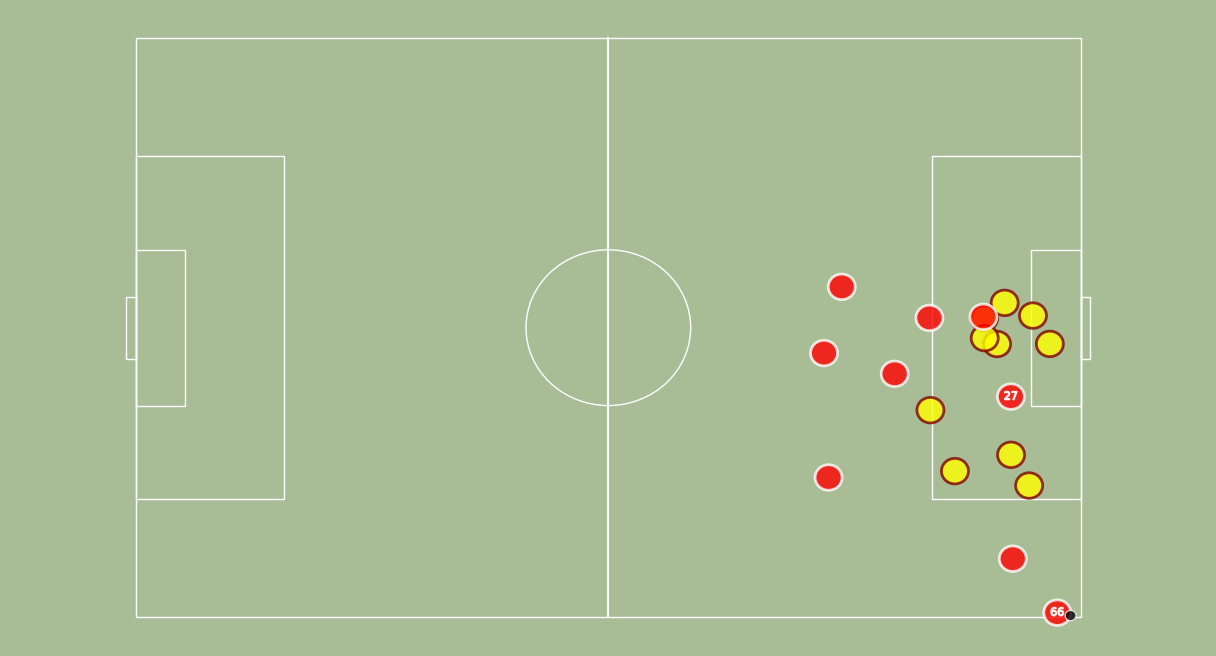

In [5]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)

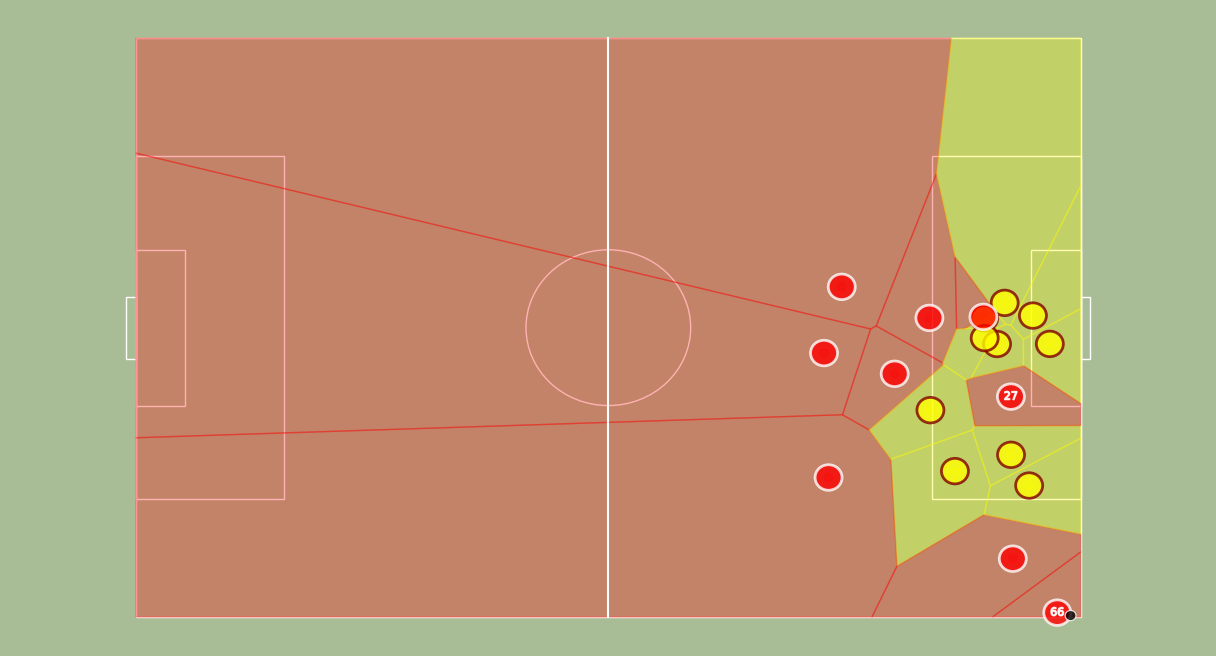

In [7]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)